<a href="https://colab.research.google.com/github/nidhinonda/Fake-News-Detection/blob/master/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Loading Dataset**




In [2]:
df=pd.read_csv('news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

**Checking class distributions**

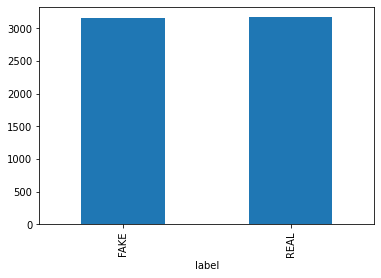

In [5]:
df.groupby("label")['title'].count().plot.bar()

**Creating stopwords for cleaning the text**

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
nltk_stopwords =stopwords.words('english')[0:500:25]
wordcloud_stopwords = STOPWORDS

nltk_stopwords.extend(wordcloud_stopwords)

stopwords = set(nltk_stopwords)
print(stopwords)

{'down', 'most', 'because', 'being', 'doesn', 'cannot', "wasn't", 'you', 'were', 'only', 'else', "he'll", 'when', 'the', "we'll", "where's", 'www', 'against', 'into', 'r', 'both', 'it', 'again', 'an', 'ever', 'nor', "we're", 'those', "wouldn't", 'get', "i'll", 'here', 'below', 'not', 'having', 'his', 'is', 'off', 'just', 'i', "there's", 'this', 'by', 'who', 'but', 'me', "isn't", 'through', 'with', 'there', "hadn't", 'about', 'we', 'these', 'has', 'once', 'ourselves', 'until', "they've", "she'll", 'over', 'shall', 'also', "i'd", "shan't", 'from', 'him', 'very', "it's", 'could', "can't", "how's", 'should', 'where', "that's", 'com', 'itself', 'any', 'their', 'few', "who's", 'does', 'did', "mustn't", 'them', "i've", "hasn't", 'all', 'he', 'herself', "i'm", 'my', "let's", 'been', "you'll", "weren't", "haven't", "we've", 'and', "they'd", 'while', 'how', "they'll", 'am', 'each', 'k', 'own', 'further', "shouldn't", 'to', 'under', 'would', 'himself', "he's", 'of', 'other', 'can', 'have', 'won',

**Cleaning the title feature**

In [8]:
import re
def clean(text):
    text = re.sub("http\S+", '', str(text))  #removes urls(if any)
    
    text = re.sub(r"he's", "he is", str(text))
    text = re.sub(r"there's", "there is", str(text))
    text = re.sub(r"We're", "We are", str(text))
    text = re.sub(r"That's", "That is", str(text))
    text = re.sub(r"won't", "will not", str(text))
    text = re.sub(r"they're", "they are", str(text))
    text = re.sub(r"Can't", "Cannot", str(text))
    text = re.sub(r"wasn't", "was not", str(text))
    text = re.sub(r"aren't", "are not", str(text))
    text = re.sub(r"isn't", "is not", str(text))
    text = re.sub(r"What's", "What is", str(text))
    text = re.sub(r"haven't", "have not", str(text))
    text = re.sub(r"hasn't", "has not", str(text))
    text = re.sub(r"There's", "There is", str(text))
    text = re.sub(r"He's", "He is", str(text))
    text = re.sub(r"It's", "It is", str(text))
    text = re.sub(r"You're", "You are", str(text))
    text = re.sub(r"I'M", "I am", str(text))
    text = re.sub(r"shouldn't", "should not", str(text))
    text = re.sub(r"wouldn't", "would not", str(text))
    text = re.sub(r"i'm", "I am", str(text))
    text = re.sub(r"I'm", "I am", str(text))
    text = re.sub(r"Isn't", "is not", str(text))
    text = re.sub(r"Here's", "Here is", str(text))
    text = re.sub(r"you've", "you have", str(text))
    text = re.sub(r"we're", "we are", str(text))
    text = re.sub(r"what's", "what is", str(text))
    text = re.sub(r"couldn't", "could not", str(text))
    text = re.sub(r"we've", "we have", str(text))
    text = re.sub(r"who's", "who is", str(text))
    text = re.sub(r"y'all", "you all", str(text))
    text = re.sub(r"would've", "would have", str(text))
    text = re.sub(r"it'll", "it will", str(text))
    text = re.sub(r"we'll", "we will", str(text))
    text = re.sub(r"We've", "We have", str(text))
    text = re.sub(r"he'll", "he will", str(text))
    text = re.sub(r"Y'all", "You all", str(text))
    text = re.sub(r"Weren't", "Were not", str(text))
    text = re.sub(r"Didn't", "Did not", str(text))
    text = re.sub(r"they'll", "they will", str(text))
    text = re.sub(r"they'd", "they would", str(text))
    text = re.sub(r"DON'T", "DO NOT", str(text))
    text = re.sub(r"they've", "they have", str(text))
    text = re.sub(r"i'd", "I would", str(text))
    text = re.sub(r"should've", "should have", str(text))
    text = re.sub(r"where's", "where is", str(text))
    text = re.sub(r"we'd", "we would", str(text))
    text = re.sub(r"Here's", "Here is", str(text))
    text = re.sub(r"you've", "you have", str(text))
    text = re.sub(r"we're", "we are", str(text))
    text = re.sub(r"what's", "what is", str(text))
    text = re.sub(r"couldn't", "could not", str(text))
    text = re.sub(r"we've", "we have", str(text))
    text = re.sub(r"who's", "who is", str(text))
    text = re.sub(r"y'all", "you all", str(text))
    text = re.sub(r"would've", "would have", str(text))
    text = re.sub(r"it'll", "it will", str(text))
    text = re.sub(r"we'll", "we will", str(text))
    text = re.sub(r"We've", "We have", str(text))
    text = re.sub(r"he'll", "he will", str(text))
    text = re.sub(r"Y'all", "You all", str(text))
    text = re.sub(r"Weren't", "Were not", str(text))
    text = re.sub(r"Didn't", "Did not", str(text))
    text = re.sub(r"they'll", "they will", str(text))
    text = re.sub(r"they'd", "they would", str(text))
    text = re.sub(r"DON'T", "DO NOT", str(text))
    text = re.sub(r"they've", "they have", str(text))
    text = re.sub(r"i'd", "I would", str(text))
    text = re.sub(r"should've", "should have", str(text))
    text = re.sub(r"where's", "where is", str(text))
    text = re.sub(r"we'd", "we would", str(text))
    text = re.sub(r"i'll", "I will", str(text))
    text = re.sub(r"weren't", "were not", str(text))
    text = re.sub(r"They're", "They are", str(text))
    text = re.sub(r"let's", "let us", str(text))
    text = re.sub(r"it's", "it is", str(text))
    text = re.sub(r"can't", "cannot", str(text))
    text = re.sub(r"don't", "do not", str(text))
    text = re.sub(r"you're", "you are", str(text))
    text = re.sub(r"i've", "I have", str(text))
    text = re.sub(r"that's", "that is", str(text))
    text = re.sub(r"i'll", "I will", str(text))
    text = re.sub(r"doesn't", "does not", str(text))
    text = re.sub(r"i'd", "I would", str(text))
    text = re.sub(r"didn't", "did not", str(text))
    text = re.sub(r"ain't", "am not", str(text))
    text = re.sub(r"you'll", "you will", str(text))
    text = re.sub(r"I've", "I have", str(text))
    text = re.sub(r"Don't", "do not", str(text))
    text = re.sub(r"I'll", "I will", str(text))
    text = re.sub(r"I'd", "I would", str(text))
    text = re.sub(r"Let's", "Let us", str(text))
    text = re.sub(r"you'd", "You would", str(text))
    text = re.sub(r"It's", "It is", str(text))
    text = re.sub(r"Ain't", "am not", str(text))
    text = re.sub(r"Haven't", "Have not", str(text))
    text = re.sub(r"Could've", "Could have", str(text))
    text = re.sub(r"youve", "you have", str(text))
    
    # Others
    text = re.sub("U.S.", "United States", str(text))
    text = re.sub("Dec", "December", str(text))
    text = re.sub("Jan.","January", str(text))
    
    # Punctuations & special characters
    text = re.sub("[^A-Za-z0-9]+"," ", str(text))
    
    # removes stop words
    text = " ".join(str(i).lower() for i in text.split() if i.lower() not in stopwords)

    return text
    

In [9]:
df['text'] = df['text'].map(lambda x: clean(x))
df.text.iloc[:3] #selects rows and columns by number(3 rows seledcted)

0    daniel greenfield shillman journalism fellow f...
1    google pinterest digg linkedin reddit stumbleu...
2    united states secretary state john f kerry sai...
Name: text, dtype: object

**Splitting into train,test and CV**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), df.label, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5068, 3) (5068,)
(1267, 3) (1267,)


**Using sklearn TfidfVectorizer**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.01,ngram_range=(1,3))
vectorizer.fit(X_train.text)

X_tr = vectorizer.transform(X_train.text)
X_te = vectorizer.transform(X_test.text)

print(X_tr.shape, X_te.shape)

(5068, 5843) (1267, 5843)


**Hyperparameter tuning Logistic Regression**

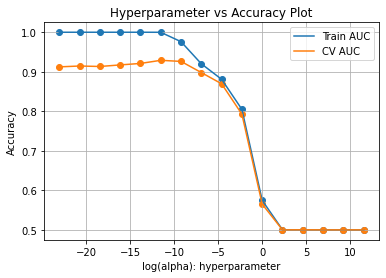

{'alpha': 1e-05}


In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import math
clf = SGDClassifier(loss='log')##logistic regression

gs = GridSearchCV(
    estimator = clf,
    param_grid = {'alpha':np.logspace(-10,5,16)},
    cv = 5,
    return_train_score = True,
    scoring = 'accuracy'
    )

gs.fit(X_tr,y_train)

results = pd.DataFrame(gs.cv_results_)

results = results.sort_values(['param_alpha'])
train_auc = results['mean_train_score']
cv_auc = results['mean_test_score']
alpha = pd.Series([ math.log(i) for i in np.array(results['param_alpha']) ]) 

plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')
plt.scatter(alpha, train_auc)
plt.scatter(alpha, cv_auc)
plt.legend()
plt.xlabel('log(alpha): hyperparameter')
plt.ylabel('Accuracy')
plt.title('Hyperparameter vs Accuracy Plot')
plt.grid()
plt.show()

print(gs.best_params_)

**Training on best parameters**

In [16]:
clf = SGDClassifier(loss='log',alpha=1e-06, random_state=42).fit(X_tr,y_train)

print('Training score : %f' % clf.score(X_tr,y_train))
print('Test score : %f' % clf.score(X_te,y_test))

Training score : 1.000000
Test score : 0.928966


In [17]:
print(classification_report(y_train.values, clf.predict(X_tr)))
confusion_matrix(y_train, clf.predict(X_tr))

              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00      2536
        REAL       1.00      1.00      1.00      2532

    accuracy                           1.00      5068
   macro avg       1.00      1.00      1.00      5068
weighted avg       1.00      1.00      1.00      5068



array([[2536,    0],
       [   0, 2532]])

**Final Test Scores**

In [26]:
print(classification_report(y_test.values, clf.predict(X_te)))
pd.DataFrame(confusion_matrix(y_test, clf.predict(X_te)))

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       628
        REAL       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



,0,1
0,584,44
1,46,593


**Top 50 n-grams**

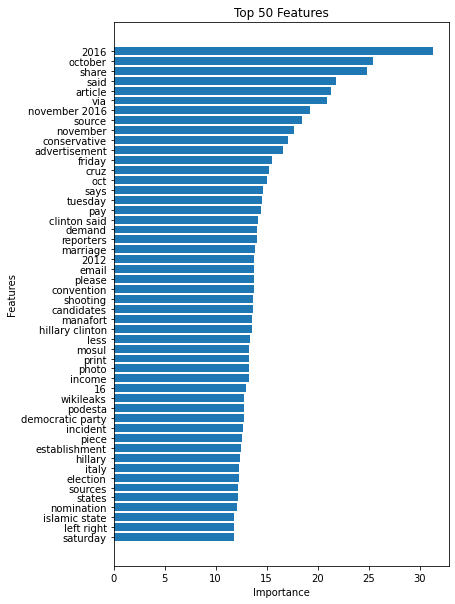

In [27]:
coef = [abs(i) for i in clf.coef_.ravel()]
feature_names = vectorizer.get_feature_names()
feature_imp = dict(zip(feature_names,coef))
feature_imp = {k: v for k, v in sorted(feature_imp.items(), key=lambda item: item[1], reverse=True)}

top_50_features = {k: feature_imp[k] for k in list(feature_imp)[0:50]}

fig, ax = plt.subplots(figsize=(6,10))

people = top_50_features.keys()
y_pos = np.arange(len(people))
importance = top_50_features.values()

ax.barh(y_pos, importance,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Top 50 Features')

plt.show()


**Bottom 50 n-grams**

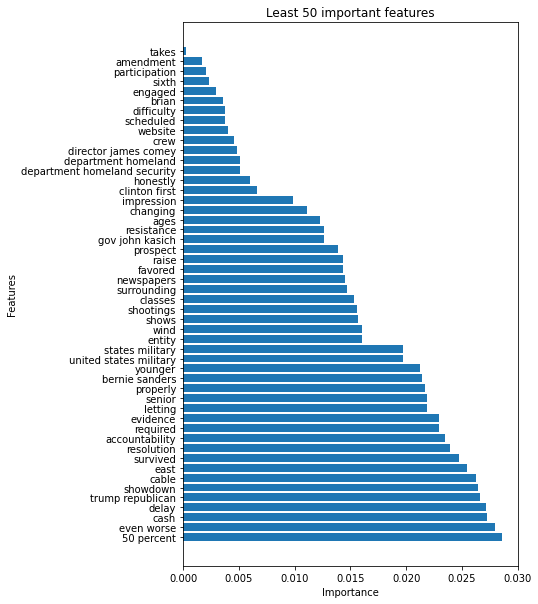

In [28]:
feature_imp = dict(zip(feature_names,coef))
feature_imp = {k: v for k, v in sorted(feature_imp.items(), key=lambda item: item[1], reverse=False)}

bottom_50_features = {k: feature_imp[k] for k in list(feature_imp)[0:50]}

fig, ax = plt.subplots(figsize=(6,10))

people = bottom_50_features.keys()
y_pos = np.arange(len(people))
importance = bottom_50_features.values()

ax.barh(y_pos, importance,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Least 50 important features')

plt.show()


**Decision Tree Classifier**

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_tr,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
predictions=dtree.predict(X_te)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

        FAKE       0.79      0.78      0.78       628
        REAL       0.79      0.79      0.79       639

    accuracy                           0.79      1267
   macro avg       0.79      0.79      0.79      1267
weighted avg       0.79      0.79      0.79      1267



In [92]:
print(confusion_matrix(y_test,predictions))

[[491 137]
 [134 505]]


**RandomForestClassifier**

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_tr, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rfc_pred=rfc.predict(X_te)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        FAKE       0.91      0.92      0.92       628
        REAL       0.92      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [95]:
print(confusion_matrix(y_test,rfc_pred))

[[577  51]
 [ 55 584]]


**Support Vector Machines**

In [96]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_tr,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
predictions=svc_model.predict(X_te)
print(confusion_matrix(y_test,predictions))

[[591  37]
 [ 49 590]]


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       628
        REAL       0.94      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

